<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('D:/Dataset ML/House Rent Dataset/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


## 1.a.The Data
The data i choose is related to the rent of house/flat/apartment in India from Kaggle that was created using the data from https://www.magicbricks.com/. The data has around 4700+ rows and 12 features (including feature called Posted On). I believe that the data is quite interesting and has the combination of categorical and continuous features which is good for practice. Here is the description of the feature:
- **Posted On**: The date of house/apartment/flat for rent in the website
- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are Located.
- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.
- **Bathroom**: Number of Bathrooms.
- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.
However since i don't live in India, i do not understand about Area Locality in there, therefore later on i will drop that feature. Additionally since i assumed that the time of posting the house for rent will not have any effect on the rent prices, i will also drop Posted On feature. Here is the link to the dataset https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset. 

In [3]:
# making spare in case of somthing wrong with the dataset
df=data.copy()
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
Data=data.drop(['Area Locality','Posted On'],axis=1)
Data.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## 1.b.Feature Attribute

In [5]:
# check the data to getting know the type and if there is any missing value
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


In [6]:
# check the unique value in each feature and see which object features is ordinal and who is categorical
Data.nunique()

BHK                    6
Rent                 243
Size                 615
Floor                480
Area Type              3
City                   6
Furnishing Status      3
Tenant Preferred       3
Bathroom               8
Point of Contact       3
dtype: int64

From the result, it seems that most of the feature here are categorical. However there is the need to identify which one is ordinal and nominal. Based on feature description, brief observation in Kaggle, and unique value counts for **Area Type, City, and Tenant Preferred** is **nominal feature**. There is the need to consider if Furnishing Status is ordinal feature which will be done later. Additionally there is a need for further investigation for feature floor as it is categorical feature but has so many unique values.

For the rest of feature with int64 type there is mistake and confusion. **Feature Rent and Size** should be considered as **continuous feature**. However the **Bathroom and BHK** will be considered as **numerical (interger) feature** since there is indeed precise measure of scale (i wil discuss about the relation between the feature and rent prices later on in the EDA section. 

In [7]:
Data['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [8]:
Data['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [9]:
Data['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [10]:
Data['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
18 out of 30         1
3 out of 58          1
8 out of 28          1
20 out of 41         1
1 out of 13          1
Name: Floor, Length: 480, dtype: int64

The value above together with the description of the feature show that actually there is 2 piece of information in this feature, one is the which floor the house/flat/apartment are located and the second is how tall the building where the home/flat/apartment is located at. Therefore to simplify the situation and prefents too much category which makes the model not to much generalised, i decided that it is better to split the feature into two feature that is original_floor and tall. However this could also mean that there could be large correlation between them. Since both new feature is interger and from description, there is precise measurement of quantity in there so both feature (**original_feature, tall**) could be considered as **numerical feature**.

In [11]:
Data[['original_floor', 'tall']] = Data['Floor'].str.split('out of', expand=True)
Data.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [12]:
Data=Data.drop('Floor',axis=1)
Data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [13]:
Data['original_floor'].value_counts()

1                  1159
2                   945
Ground              926
3                   511
4                   272
5                   164
6                    93
7                    74
10                   67
8                    66
9                    65
12                   47
11                   43
15                   41
14                   34
18                   26
Upper Basement       23
17                   22
16                   21
19                   16
13                   15
25                   12
20                   12
Lower Basement       11
23                    9
24                    6
21                    6
30                    5
34                    4
28                    4
35                    3
32                    3
65                    3
26                    3
27                    3
60                    3
22                    3
45                    2
1                     2
40                    2
36                    2
48              

In [14]:
Data['tall'].value_counts()

 4     938
 3     914
 2     868
 5     422
 1     333
      ... 
 71      1
 85      1
 66      1
 62      1
 89      1
Name: tall, Length: 66, dtype: int64

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
 9   original_floor     4746 non-null   object
 10  tall               4742 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


Due to the variation of the unique value, i decided to see if this feature falls into which type of feature.

In [16]:
# turn the size and rent to continuous ie.float
Data['Rent'] = Data['Rent'].astype('float64')
Data['Size'] = Data['Size'].astype('float64')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   float64
 2   Size               4746 non-null   float64
 3   Area Type          4746 non-null   object 
 4   City               4746 non-null   object 
 5   Furnishing Status  4746 non-null   object 
 6   Tenant Preferred   4746 non-null   object 
 7   Bathroom           4746 non-null   int64  
 8   Point of Contact   4746 non-null   object 
 9   original_floor     4746 non-null   object 
 10  tall               4742 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 408.0+ KB


## 1.c.Checking Further for Few Feature

### Furnishing Status

In [17]:
def quantile_25(data):
    q1 = np.percentile(data, 25)
    return q1
def quantile_75(data):
    q1 = np.percentile(data, 75)
    return q1

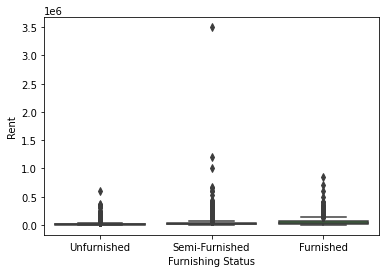

,min,quantile_25,median,mean,quantile_75,max
,Rent,Rent,Rent,Rent,Rent,Rent
Furnishing Status,,,,,,
Furnished,1200.0,15000.0,27000.0,56110.305882,65000.0,850000.0
Semi-Furnished,1500.0,12000.0,18000.0,38718.810751,35000.0,3500000.0
Unfurnished,2000.0,8000.0,12000.0,22461.635813,22000.0,600000.0


In [18]:
sns.boxplot(x='Furnishing Status',y='Rent',data=Data)
plt.show()

# Create a pivot table to calculate the descriptive statistics
summary_stats = Data.pivot_table(index='Furnishing Status', values='Rent', aggfunc=['min', quantile_25, 'median', 'mean', quantile_75, 'max'])
summary_stats

Although there is some deviation in the minimum dan maximum value, it could be seen that generally the more furnished the home/flat/apartment is, the more expensive the rent is. This progression show that **Furnishing Status** could be considered as **ordinal feature**.

### original_floor

In [19]:
# because there is two Ground in the value_counts, it is better to strip the whitespace
Data['original_floor'] = Data['original_floor'].str.strip()

In [20]:
# to enable clearer understanding, the Ground, Upper Basement and etc shall be converted into number

Data['original_floor'] = Data['original_floor'].replace("Ground", 0)
Data['original_floor'] = Data['original_floor'].replace("Upper Basement", -1)
Data['original_floor'] = Data['original_floor'].replace("Lower Basement", -2)

In [21]:
# to better understand relationship, it is better to use plot and summary statistics
# convert to interger
Data['original_floor'] = Data['original_floor'].astype('int64')

The few measurement in feature original_floor has been transformed into interger value so the feature can be coverted into interger type.

### tall

In [22]:
# before converting this feature as interger see if there is any string
Data['tall'].unique()

array([' 2', ' 3', ' 1', ' 4', ' 5', ' 14', ' 8', ' 6', ' 19', ' 10',
       ' 7', ' 13', ' 78', ' 18', ' 12', ' 24', ' 31', ' 21', ' 23',
       ' 20', ' 9', ' 22', ' 58', ' 16', ' 66', ' 48', ' 40', ' 44',
       ' 42', ' 41', ' 60', ' 32', ' 30', ' 29', ' 89', ' 15', ' 11',
       ' 28', ' 17', ' 45', ' 35', ' 75', ' 38', ' 51', ' 43', ' 25',
       ' 27', ' 26', ' 76', ' 36', ' 37', ' 55', ' 68', ' 77', ' 50',
       ' 59', ' 62', ' 39', ' 52', ' 54', ' 33', ' 46', ' 85', ' 71',
       ' 81', ' 34', None], dtype=object)

In [23]:
# see the rows that has the missing value
Data[Data['tall'].isna()]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
2553,2,20000.0,400.0,Super Area,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,3,None
2883,1,18000.0,450.0,Carpet Area,Delhi,Furnished,Bachelors/Family,1,Contact Owner,0,None
4490,3,15000.0,900.0,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,None
4560,3,15000.0,1270.0,Carpet Area,Hyderabad,Furnished,Family,2,Contact Owner,1,None


In [24]:
# fill the missing value with the exception of index 2883 all will be filled using the value of the original floor
index=[2553,4490,4560]
for i in index:
    Data.loc[i, 'tall']=Data.loc[i, 'original_floor']
Data.loc[2883,'tall']=1

In [25]:
Data.loc[[2553,2883,4490,4560],:]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
2553,2,20000.0,400.0,Super Area,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,3,3
2883,1,18000.0,450.0,Carpet Area,Delhi,Furnished,Bachelors/Family,1,Contact Owner,0,1
4490,3,15000.0,900.0,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,1
4560,3,15000.0,1270.0,Carpet Area,Hyderabad,Furnished,Family,2,Contact Owner,1,1


In [26]:
# convert as interger
Data['tall'] = Data['tall'].astype('int64')

Therefore the feature tall is able to be numerical feature right now.

## 1.d.Summary of the Feature

In [27]:
# for interger and continuous feature here is their summary
Data.describe()

,BHK,Rent,Size,Bathroom,original_floor,tall
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866,3.436157,6.968816
std,0.832256,7.810641e+04,634.202328,0.884532,5.773950,9.467101
min,1.000000,1.200000e+03,10.000000,1.000000,-2.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,1.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,2.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,3.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,76.000000,89.000000


Well i see that all of those numerical feature above each has their own range of value from the BHK which has small range of value to Rent that has large range of value. Since Rent is the target feature it is okay. However for the rest, their range is similar however it is indeed much saver to use scaling later on though in my opinion, creates quite a problem when interpreting the model, which is caused by the diffrent of the unit value that being used in each feature. 

In conclusion the data has 4746 rows with 10 will be used as predictor in which 5 are categorical and 5 are numerical. From that 5 categorical, there is one ordinal features and the rest are nominal features. From the numerical, 4 are interger and 1 is continuous. Here is the summary of the feature:
- BHK: interger numerical
- Size: continuous numerical
- Area Type: nominal categorical
- City: nominal categorical
- Furnishing Status: ordinal categorical
- Tenant Preferred: nominal categorical
- Bathroom: interger numerical
- Point of Contact: nominal categorical
- original_floor: interger numerical
- tall: interger numerical

# 2. Objectives


My main objective in this project will be leaning towards prediction. However i do want some interpretation coming from the feature importance. Additionally in this project i hope that my EDA has been carried properly as well from checking normality assumption for the target feature and feature transformation (if necessary), correlation and paired plot, and also encoding.

# 3. EDA

Before actually getting started with the EDA, it will be proper to actually split between the categorical and numerical feature because their treatment for EDA is different especially in plot and transformation (if necessary)

In [28]:
# getting the numrical subset of the data
numerical= Data.select_dtypes(include=['float64', 'int64'])
print(numerical.head())
# getting the categorical
category=Data.select_dtypes(include='object')
print(category.head())

   BHK     Rent    Size  Bathroom  original_floor  tall
0    2  10000.0  1100.0         2               0     2
1    2  20000.0   800.0         1               1     3
2    2  17000.0  1000.0         1               1     3
3    2  10000.0   800.0         1               1     2
4    2   7500.0   850.0         1               1     2
     Area Type     City Furnishing Status  Tenant Preferred Point of Contact
0   Super Area  Kolkata       Unfurnished  Bachelors/Family    Contact Owner
1   Super Area  Kolkata    Semi-Furnished  Bachelors/Family    Contact Owner
2   Super Area  Kolkata    Semi-Furnished  Bachelors/Family    Contact Owner
3   Super Area  Kolkata       Unfurnished  Bachelors/Family    Contact Owner
4  Carpet Area  Kolkata       Unfurnished         Bachelors    Contact Owner


## 3.a.Numerical Feature

### 3.a.i.ScatterPlot

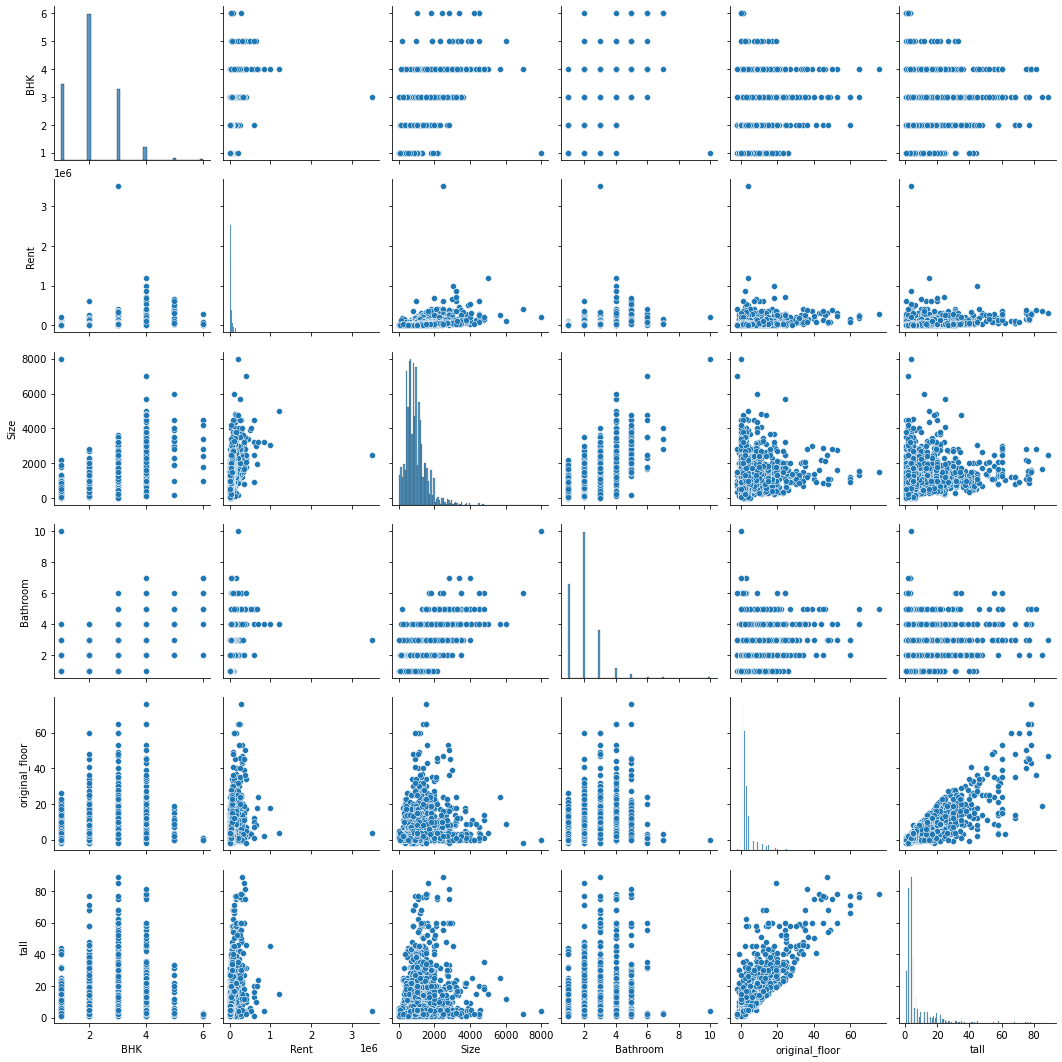

In [29]:
sns.pairplot(numerical)

Here are my main insight:
- There is indeed a logical correlation or even causation between the BHK, Bathroom, and Size in which as per seen in the plot above show that they are moving on the same direction. However while there is indeed an increase of size and bathroom generally, the same thing does not seems to be happening for BHK which perhaps due to the concentration of value in lower value BHK. 
- Perhaps the original_floor and tall has the same direction with the rent prices. However since there is quite an unusual values on both feature, i can't seemingly see it quite clearly
- There seems to be an outlier related to BHK, Bathroom, and Size for the rent price of 350000
- There is a need for further digging using summary statistics

### 3.a.ii.Handle Normality for Target Feature

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


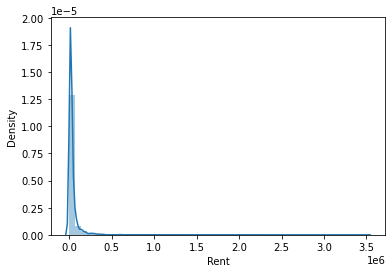

Skewness: 21.409942


In [30]:
sns.distplot(Data['Rent'])
plt.show()
print("Skewness: %f" % Data['Rent'].skew())

The target feature has very skewed data which do not satisfy the niormality assumption for linear regression. Therefore there is the need to either cut the outliers or do tranformation to the feature

#### Drop the Outlier

In [31]:
#filter the row that has an outlier
filtered_data = Data[Data['Rent'] > 3000000]
filtered_data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
1837,3,3500000.0,2500.0,Carpet Area,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,4,4


In [37]:
# drop the value of the outliers -> but seraching using condition so that if run twice did not cause any harm to the data
DF=Data.copy()
DF.drop(Data[Data['Rent'] > 3000000].index, inplace=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


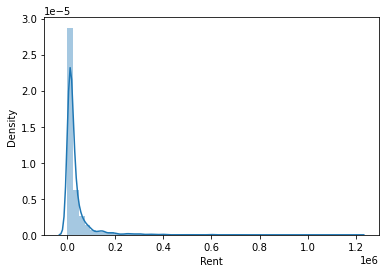

Skewness: 6.743269


In [33]:
sns.distplot(DF['Rent'])
plt.show()
print("Skewness: %f" % DF['Rent'].skew())

The skewness certainly has been improved, however not close enough to be normal. The skewness that is near normal is between -0,5 to 0,5. To those with the value of -1 to -0.5 or 0.5 to 1 is moderate skewness and beyond that value is severe. I am compelled to check the pairplot to do bivariate analysis (between predictors and target feature) on the outliers and using boxplot to do univariate analysis. 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rent'>

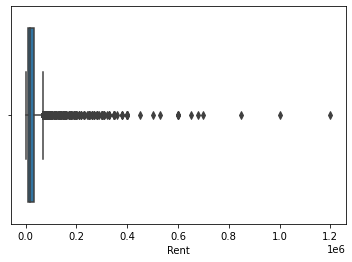

In [34]:
sns.boxplot(DF['Rent'])

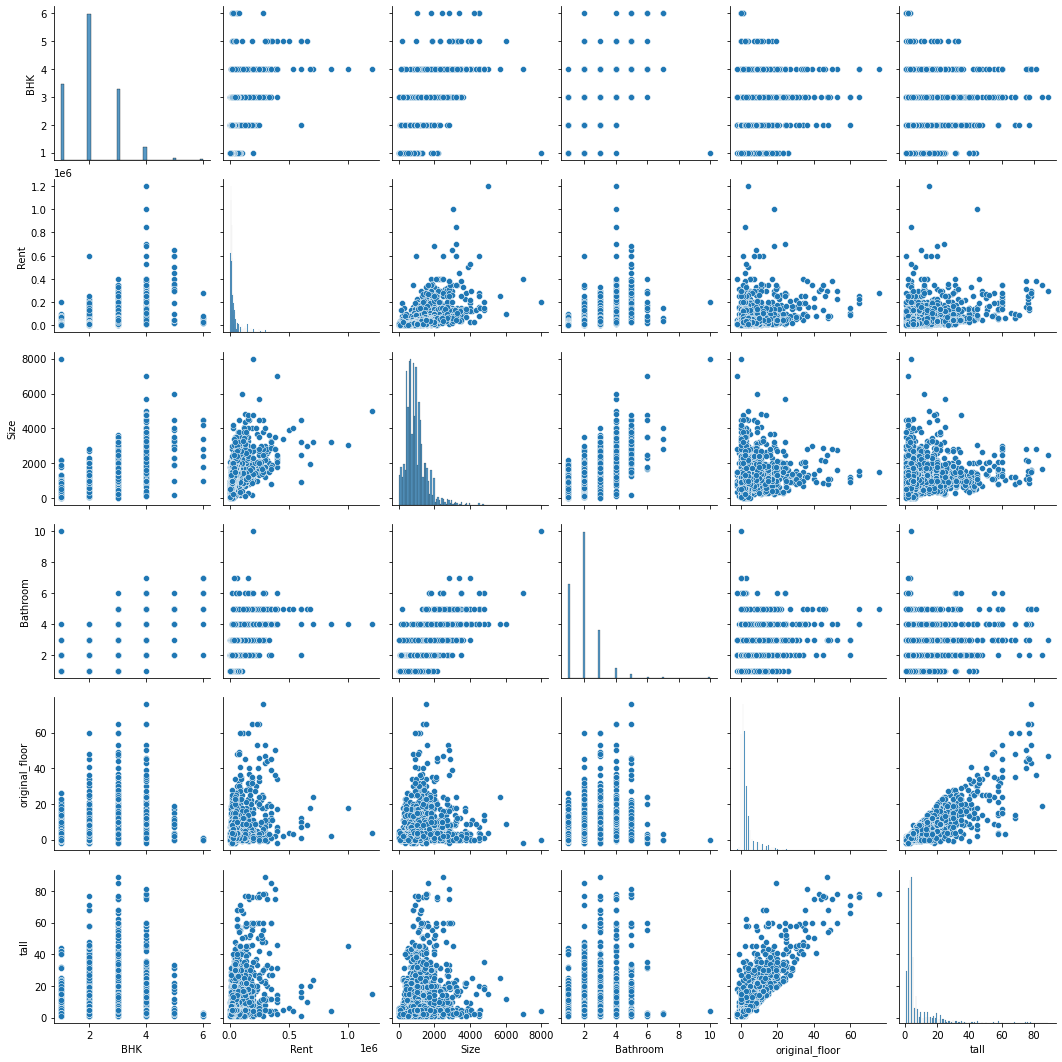

In [35]:
# since the skewness in the data is still pretty much high, it is better to check again
sns.pairplot(DF)

I see that there is quite large outliers at number beyond 800,000 in rent. This do infer that most of the places being rented in the website is below number of 800,000. My next step is to remove rent value larger than 800,000. In terms of cons of this measure is that the losing information for the very expensive rent.

In [38]:
#filter the row that has an outlier
filtered_data = Data[Data['Rent'] > 800000]
filtered_data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall
827,4,1000000.0,3064.0,Carpet Area,Mumbai,Semi-Furnished,Family,4,Contact Agent,18,45
1001,4,1200000.0,5000.0,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent,4,15
1329,4,850000.0,3200.0,Carpet Area,Mumbai,Furnished,Bachelors/Family,4,Contact Agent,2,4
1837,3,3500000.0,2500.0,Carpet Area,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,4,4


In [40]:
DF.drop(DF[DF['Rent'] > 800000].index, inplace=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


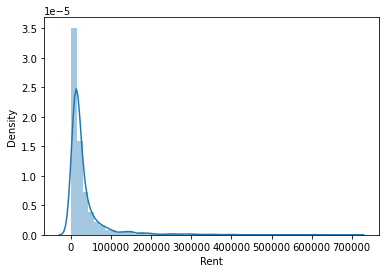

Skewness: 5.035146


In [41]:
sns.distplot(DF['Rent'])
plt.show()
print("Skewness: %f" % DF['Rent'].skew())

#### log transformation

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


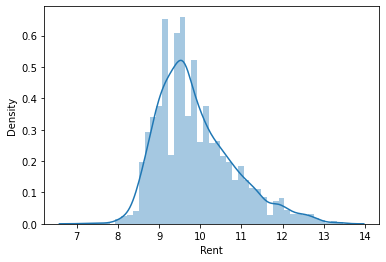

Skewness: 0.859279


In [42]:
# still on trial so it is not imposed to the dataset yet
log_transformed=np.log(DF['Rent'])


sns.distplot(log_transformed)
plt.show()
print("Skewness: %f" % log_transformed.skew())

It does improve to the extend of becoming moderate skeness (mathematically) but visually it is close. Lest compared it with box-cox instead. If the value of box-cox is not ridicilous, i will take the box-cox but if it quite ridicilous, i will the the log

#### Box-Cox Tranformation

In [43]:
from scipy.stats import boxcox

In [44]:
bc_result = boxcox(DF.Rent)
boxcox_bc = bc_result[0]
lam = bc_result[1]

In [45]:
lam

-0.33856040331277903

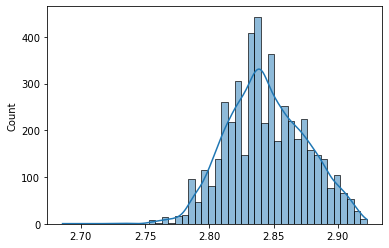

NormaltestResult(statistic=3.766658151539483, pvalue=0.1520829663542296)
Skewness: 0.034851


In [46]:
sns.histplot(boxcox_bc,kde=True)
plt.show()

# i use narmal test insteaad of skewness since the result of boxcox is not able to use skew()
print(normaltest(boxcox_bc))

boxcox_series = pd.Series(boxcox_bc)
print("Skewness: %f" % boxcox_series.skew())

The boxcox did has superior performance compared to log tranformation in turning rent into much more Normal Feature. However the value of the boxcox will make it difficult later on to interpret. The goals of this project in my case is prediction so naturaly boxcox is the choise however the boxcox will result on interpretation difficulty later on. Therefotre i will choose the log transformation instead.  

In [47]:
DF['rent_log']=np.log(DF['Rent'])
DF.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658


## 3.a.iii.Correlation Plot

In [49]:
# getting the numrical subset of the data
numeric= DF.select_dtypes(include=['float64', 'int64'])
print(numeric.head())
# getting the categorical
categ=DF.select_dtypes(include='object')
print(categ.head())

   BHK     Rent    Size  Bathroom  original_floor  tall  rent_log
0    2  10000.0  1100.0         2               0     2  9.210340
1    2  20000.0   800.0         1               1     3  9.903488
2    2  17000.0  1000.0         1               1     3  9.740969
3    2  10000.0   800.0         1               1     2  9.210340
4    2   7500.0   850.0         1               1     2  8.922658
     Area Type     City Furnishing Status  Tenant Preferred Point of Contact
0   Super Area  Kolkata       Unfurnished  Bachelors/Family    Contact Owner
1   Super Area  Kolkata    Semi-Furnished  Bachelors/Family    Contact Owner
2   Super Area  Kolkata    Semi-Furnished  Bachelors/Family    Contact Owner
3   Super Area  Kolkata       Unfurnished  Bachelors/Family    Contact Owner
4  Carpet Area  Kolkata       Unfurnished         Bachelors    Contact Owner


<AxesSubplot:>

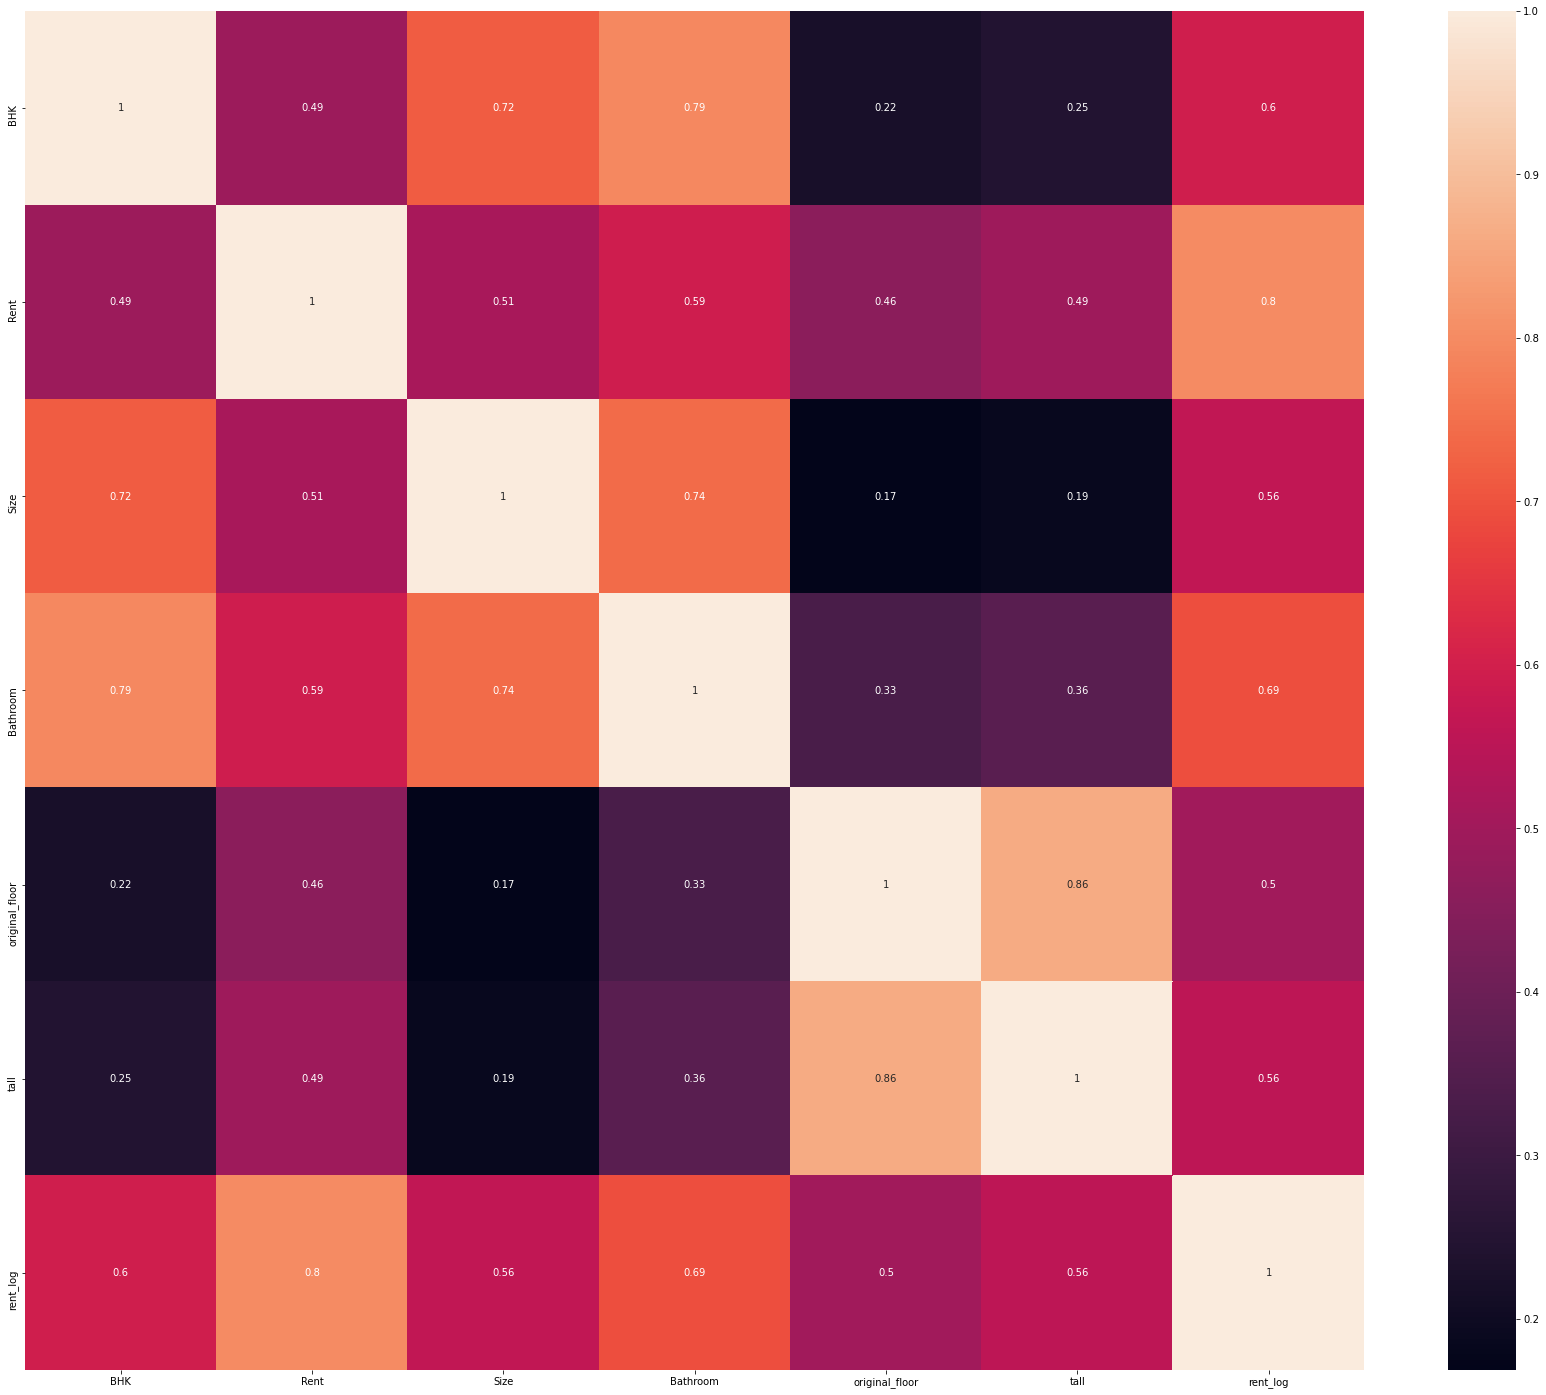

In [50]:
plt.figure(figsize = (30, 25))
sns.heatmap(numeric.corr(),annot=True)

There is indeed strong correlation to between numerical features. Especially between Size, Bathroom, and BHK and also original_floor and tall. This suggest that there is some correlation or even causation. For Size, Bathroom, and BHK it is very reasonable since they are indeed connected. All of this does mean that there is multicollinearity between features. However it is better that i keep all of this feature because i think there is a reasonable factors of each feature to the rent prices based on my limited knowledge about rent. Additionally ever since being log-tranformed it's correlation also gone up which is better than without transformation.

## 3.b.Categorical Feature

### 3.b.i.Boxplot and Summary Statistics

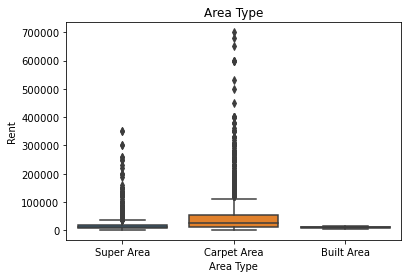

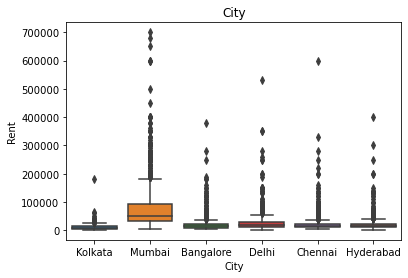

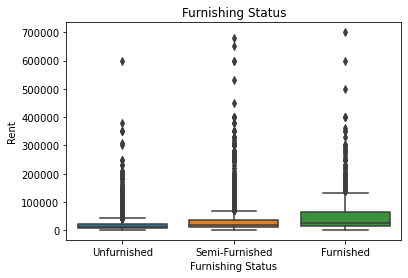

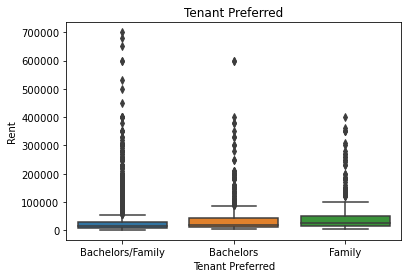

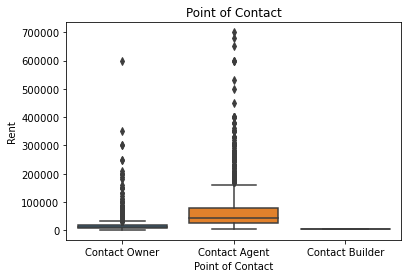

In [52]:
for fit in category.columns:
    sns.boxplot(x=fit, y="Rent", data=DF)
    plt.title(fit)
    plt.show()

Visually with the exception of Tenant Preferred has different of value across their category. In the next i will use Chi Square Test for independence to see if there is any relationship between them.

In [53]:
for fit in category.columns:
    summary=DF.groupby(fit)['Rent'].describe()
    print(fit)
    print(summary)
    print("----------------------")

Area Type
              count          mean           std     min      25%      50%  \
Area Type                                                                   
Built Area      2.0  10500.000000   6363.961031  6000.0   8250.0  10500.0   
Carpet Area  2294.0  49621.966870  70381.680870  1200.0  13000.0  25000.0   
Super Area   2446.0  18673.396566  24654.987588  1500.0   8500.0  13000.0   

                 75%       max  
Area Type                       
Built Area   12750.0   15000.0  
Carpet Area  55000.0  700000.0  
Super Area   20000.0  350000.0  
----------------------
City
           count          mean           std     min      25%      50%  \
City                                                                     
Bangalore  885.0  21039.774011  27456.847512  3500.0   9500.0  14000.0   
Chennai    891.0  21614.092031  33069.910236  3000.0  10000.0  14000.0   
Delhi      605.0  29461.983471  43542.047016  2000.0  11000.0  17000.0   
Hyderabad  868.0  20555.048387  26436.196

This summary statistcs do enforce my findings in the boxplot. With the exception of Furnishing Status which indeed has certain order the other feature has quite random findings. For Point of Contact, there is significant difference between Contact Owner and the Contact Agent in which the cheaper being the Contact Owner which is indeed pretty plausible since they are cutting the middle men. Although there seems to be third category that is Contact Builder it does not create any significance due to it's low count value. The same happen in Tenant Preferred in which Family has the highest rent followed by Bachelors/Family and Bachelors. The same can also being inferred from Area Type, however since i don't familiar which such word or property i decided to keep the feature as nominal one. The **Point of Contact and Tenant Prefered** need to be considered as **ordinal feature** from before as ordinal feature.

### 3.b.ii.Chi-Square Test for Independece
It is for seeing if there is any relationship between these categorical feature. The null hypotesis being there is no association between 2 features that being tested

In [54]:
import scipy.stats as stats
cat=category.columns
significant_pairs = []

for i in range(0,len(category.columns)):
    for j in range(i+1,len(category.columns)):
        contingency_table = pd.crosstab(category.iloc[:,i], category.iloc[:,j])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        if p < 0.05:  # Adjust the significance level as needed
            significant_pairs.append((cat[i], cat[j]))

significant_pairs

[('Area Type', 'City'),
 ('Area Type', 'Furnishing Status'),
 ('Area Type', 'Tenant Preferred'),
 ('Area Type', 'Point of Contact'),
 ('City', 'Furnishing Status'),
 ('City', 'Tenant Preferred'),
 ('City', 'Point of Contact'),
 ('Furnishing Status', 'Tenant Preferred'),
 ('Furnishing Status', 'Point of Contact'),
 ('Tenant Preferred', 'Point of Contact')]

There is indeed 10 out of 15 possible connection that is possible between the categorical feature. Hiwever since i want to keep this simple and also i still not understand what to do with correlated categorical feature. I will stop till here only

### 3.b.iii.Encoding
First i will do the ordinal encoding then the nominal encoding

In [55]:
DaFa=DF.copy()

#### Ordinal Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder

**Furnishing Status**

In [57]:
DF['Furnishing Status'].value_counts()

Semi-Furnished    2248
Unfurnished       1815
Furnished          679
Name: Furnishing Status, dtype: int64

In [58]:
#define the ordinal scale
ordinal_scale = ['Unfurnished', 'Semi-Furnished', 'Furnished']

# create instances for furnishing status
ordi = OrdinalEncoder(categories=[ordinal_scale])


In [59]:
# fitting it to the data
DaFa['Furnish'] = ordi.fit_transform(DaFa[['Furnishing Status']])
DaFa.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658,0.0


In [60]:
DaFa.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658,0.0


**Tenant Preferred**

In [61]:
#define the ordinal scale
ordinal_scale = ['Bachelors', 'Bachelors/Family', 'Family']

# create instances for preferred tenant
ordi1 = OrdinalEncoder(categories=[ordinal_scale])


In [62]:
# fitting it to the data
DaFa['prefe'] = ordi1.fit_transform(DaFa[['Tenant Preferred']])
DaFa.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish,prefe
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0,1.0
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0,1.0
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0,1.0
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0,1.0
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658,0.0,0.0


**Point of Contact**

In [63]:
#define the ordinal scale
ordinal_scale = ['Contact Builder', 'Contact Owner', 'Contact Agent']

# create instances for point of contact
ordi2 = OrdinalEncoder(categories=[ordinal_scale])


In [64]:
# fitting it to the data
DaFa['PIC'] = ordi2.fit_transform(DaFa[['Point of Contact']])
DaFa.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish,prefe,PIC
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0,1.0,1.0
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0,1.0,1.0
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0,1.0,1.0
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0,1.0,1.0
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658,0.0,0.0,1.0


#### One-Hot Encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
encoder = OneHotEncoder(sparse=False)

In [67]:
nominal=['Area Type','City']

In [68]:
DaFa

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish,prefe,PIC
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0,1.0,1.0
1,2,20000.0,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0,1.0,1.0
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0,1.0,1.0
3,2,10000.0,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0,1.0,1.0
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,8.922658,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000.0,1000.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,9.615805,1.0,1.0,1.0
4742,3,29000.0,2000.0,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,10.275051,1.0,1.0,1.0
4743,3,35000.0,1750.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,10.463103,1.0,1.0,2.0
4744,3,45000.0,1500.0,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,10.714418,1.0,2.0,2.0


In [69]:
encoded = pd.get_dummies(DaFa, columns=nominal, drop_first=True)

In [70]:
encoded_data=encoded.drop('Furnishing Status',axis=1)
encoded_data.head()

,BHK,Rent,Size,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish,prefe,PIC,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000.0,1100.0,Bachelors/Family,2,Contact Owner,0,2,9.210340,0.0,1.0,1.0,0,1,0,0,0,1,0
1,2,20000.0,800.0,Bachelors/Family,1,Contact Owner,1,3,9.903488,1.0,1.0,1.0,0,1,0,0,0,1,0
2,2,17000.0,1000.0,Bachelors/Family,1,Contact Owner,1,3,9.740969,1.0,1.0,1.0,0,1,0,0,0,1,0
3,2,10000.0,800.0,Bachelors/Family,1,Contact Owner,1,2,9.210340,0.0,1.0,1.0,0,1,0,0,0,1,0
4,2,7500.0,850.0,Bachelors,1,Contact Owner,1,2,8.922658,0.0,0.0,1.0,1,0,0,0,0,1,0


From the above one-hot encoder, for feature with n unique feature, there will be n-1 feature now since one is being used as the benchmark for the rest. In the case of City, the bechmark come from Bangalore. The Area Type by Built Area.

## 3.c.Scaling
On this section, i will do Min-Max scaling to my numerical feature so that i could see feature importance easily. Why choose it instead of Standard Scaling? The reason is because many of the feature i used (numerical) has outlier in univariate analysis. Additionally (i am inferring myself) i seem not confident that they has normal distribution. 

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
dfa=encoded.copy()

In [74]:
# Fit and transform the data using Min-Max scaling
# the numerical does not include the target feature now that is rent_log
dfa[numerical.columns]= scaler.fit_transform(encoded[numerical.columns])

In [75]:
dfa.head()

,BHK,Rent,Size,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,original_floor,tall,rent_log,Furnish,prefe,PIC,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.2,0.012593,0.136421,Unfurnished,Bachelors/Family,0.111111,Contact Owner,0.025641,0.011364,9.210340,0.0,1.0,1.0,0,1,0,0,0,1,0
1,0.2,0.026903,0.098874,Semi-Furnished,Bachelors/Family,0.000000,Contact Owner,0.038462,0.022727,9.903488,1.0,1.0,1.0,0,1,0,0,0,1,0
2,0.2,0.022610,0.123905,Semi-Furnished,Bachelors/Family,0.000000,Contact Owner,0.038462,0.022727,9.740969,1.0,1.0,1.0,0,1,0,0,0,1,0
3,0.2,0.012593,0.098874,Unfurnished,Bachelors/Family,0.000000,Contact Owner,0.038462,0.011364,9.210340,0.0,1.0,1.0,0,1,0,0,0,1,0
4,0.2,0.009015,0.105131,Unfurnished,Bachelors,0.000000,Contact Owner,0.038462,0.011364,8.922658,0.0,0.0,1.0,1,0,0,0,0,1,0


# 4. Linear Regression Models

In this section, i will do few things:
- Make train and test split and do Cross Validation (if there is hyperparameter)
- Make linear regression, polynomial regression, and polynomial with regularisation
- Evaluate the regression through r2 score

## 4.a.Train-Test Data Split
On this sub-section, i will split the data using KFold. To ensure comparison that is not bias, i decided that it will be necessary to use the same KFold for both linear regression, linear regression with polynomial features, and linear regression with regularisation.  

In [76]:
# Splitting the predictors and target
y=dfa['rent_log']

columns_to_exclude = ["Rent", "rent_log",'Furnishing Status','Tenant Preferred','Point of Contact']
X=dfa.drop(columns=columns_to_exclude)

In [77]:
# get the train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.b.Linear Regression

In [78]:
#create instance of class
lr = LinearRegression()

# Fit the data then predict
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#testing its r2 score and mean_squared error
print("r2 score: ",r2_score(y_pred,y_test))
print("MSE: ",mean_squared_error(y_pred,y_test))

r2 score:  0.7813539597692787
MSE:  0.1586886362406159


In [83]:
def compare_plot(y,yt):
    plt.figure()
    ax1=sns.distplot(y, hist=False,color='r',label='Actual Value on Rent')
    sns.distplot(yt,hist=False,color='b',label='Predicted Value on Rent',ax=ax1)
    plt.legend()
    
    plt.title('Actual Vs Predicted Value')
    
    plt.show()
    plt.close()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


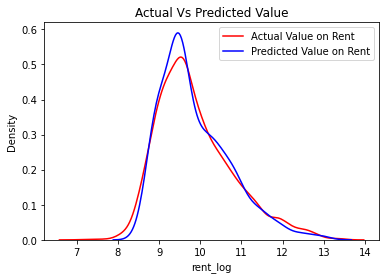

In [85]:
# buat kayak di Practice Lab polynomial features plot_dis
compare_plot(y,y_pred)

It could be seen that the accuracy on the linear regression model for rent is moderate at best. From the plot above, i could see that the model has difficulty predicting near the median value. Additionally from the inpection from the train dataset, it could be concluded that the model is not overfitting. I do deduce that perhaps the multicollinearity and outliers do contribute to the problem.

In [158]:
# see the y_train to see if there is any overfitting
y_pred_train=lr.predict(X_train)

#testing its r2 score and mean_squared error
linear_r2=r2_score(y_pred_train,y_train)
linear_mse=mean_squared_error(y_pred_train,y_train)
print("r2 score: ",linear_r2)
print("MSE: ",linear_mse)

r2 score:  0.7719096739430377
MSE:  0.1589001110043449


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


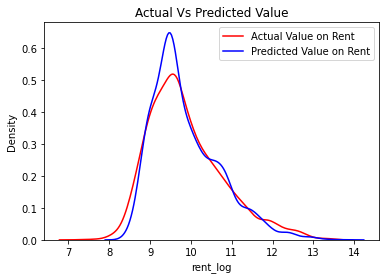

In [86]:
compare_plot(y_train,y_pred_train)

In [213]:
# Get the coefficients
coefficients = lr.coef_
coefficients
# Get the feature names from PolynomialFeatures
feature_names = X_train.columns

array([ 1.12602683,  3.26507704,  1.36374166,  0.21829827,  0.44786911,
        0.13105669, -0.06195883,  0.316807  ,  0.12309244,  0.07864431,
       -0.018981  ,  0.19812704, -0.14185619, -0.28044016,  0.93648178])

In [214]:
lin_coeff=pd.DataFrame(zip(feature_names,coefficients))

lin_coeff.rename(columns={0: 'Feature'}, inplace=True)
lin_coeff.rename(columns={1: 'Coeff'}, inplace=True)
lin_coeff

,Feature,Coeff
0,BHK,1.126027
1,Size,3.265077
2,Bathroom,1.363742
3,original_floor,0.218298
4,tall,0.447869
5,Furnish,0.131057
6,prefe,-0.061959
7,PIC,0.316807
8,Area Type_Carpet Area,0.123092
9,Area Type_Super Area,0.078644


## 4.c.Regression With Polynomial Features
Perhaps in this subsection i will also use cross validation that is GridSearchCV to tune the hyperparameter escpecially it's degree.

In [97]:
# building the estimator for GridSearchCV
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [110]:
# building params grid that comprised hyperparameter going to be tuned
params_grid={'polynomial__degree':[1,2,3,4,5]
            }

In [124]:
search = GridSearchCV(pipe, params_grid, n_jobs=5)

In [125]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=5, param_grid={'polynomial__degree': [1, 2, 3, 4, 5]})

In [126]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [114]:
y_pred_poly=best.predict(X_test)

In [115]:
r2_score(y_test,y_pred_poly)

0.8214689590608033

The result of the GridSearchCV shows that it is better to have degree of one which betray the  point of making regression with polynomial features. Therefore i will instead try to make degree 2 polynomial features instead then comared it's score and MSE with the linear regression.

In [203]:
# using the previous pipeline to fit 
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [204]:
pipe.fit(X_train,y_train)
y_pred_poly1=pipe.predict(X_test)

In [205]:
# print the score
poly_r2=r2_score(y_pred_poly1,y_test)
poly_mse=mean_squared_error(y_pred_poly1,y_test)
print("r2 score: ",poly_r2)
print("MSE: ",poly_mse)

r2 score:  0.8047347380164048
MSE:  0.14721739111621893


In [206]:
# to check overfitting see the training
y_poly_train=pipe.predict(X_train)

print("r2 score for training set: ",r2_score(y_poly_train,y_train))
print("MSE for training set: ",mean_squared_error(y_poly_train,y_train))

r2 score for training set:  0.8026875251899822
MSE for training set:  0.1409351325351518


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


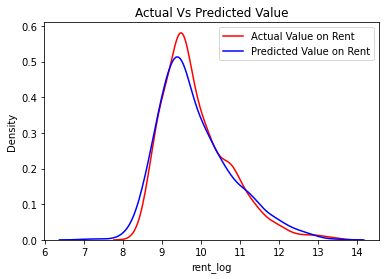

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


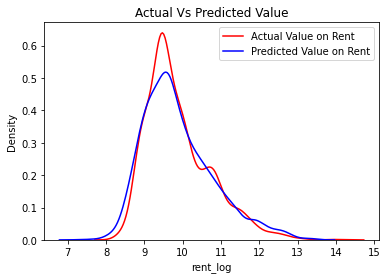

In [207]:
# see the plot for test set
compare_plot(y_pred_poly1,y_test)

# see the plot for the training set
compare_plot(y_poly_train,y_train)

In [208]:
# Access the Ridge Regression step within the pipeline
poly_model = pipe.named_steps['model']

# Get the coefficients
coefficients = poly_model.coef_


In [210]:
# Access the PolynomialFeatures step within the pipeline
poly = pipe.named_steps['polynomial']

#Get the feature names
feature_names = poly.get_feature_names_out(input_features=X_train.columns)

In [211]:
poly_coeff=pd.DataFrame(zip(best_name,coefficients))

poly_coeff.rename(columns={0: 'Feature'}, inplace=True)
poly_coeff.rename(columns={1: 'Coeff'}, inplace=True)
poly_coeff

,Feature,Coeff
0,BHK,3.143267e+11
1,Size,-1.541512e+10
2,Bathroom,6.356076e+11
3,original_floor,-3.021127e+10
4,tall,6.949271e+10
...,...,...
130,City_Hyderabad City_Kolkata,0.000000e+00
131,City_Hyderabad City_Mumbai,0.000000e+00
132,City_Kolkata^2,-1.900537e+09
133,City_Kolkata City_Mumbai,0.000000e+00


From the r2 score and MSE, the regression with polynomial features of degree 2 has improvement compared to the original linear regression. However it needs to be admitted that since the polynomial degree in this case is much more arbitary there is indeed possibility that it may not be the best choice. From the plot, i see no indication of overfitting. Therefore there is indeed slight improvement using polynomial features, the cross validation shows otherwise which perhaps makes it quite undesirable. 

### 4.d.Regression WIth Regularization
I shall also use cross validation before making the model to tune the hyper parameter. There will be 2 model i make that is Ridge regression without polynomial features and the other is Ridge regression with polynomial features

**With Polynomial Features**

In [144]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('Ridge',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [145]:
# building params grid that comprised hyperparameter going to be tuned
params_grid={'polynomial__degree':[1,2,3,4,5],
            'Ridge__alpha':np.geomspace(0.00005,15,30)
            }

In [146]:
grid = GridSearchCV(pipe, params_grid, n_jobs=4)

In [150]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('Ridge', Ridge(alpha=1))]),
             n_jobs=4,
             param_grid={'Ridge__alpha': array([5.00000000e-05, 7.72389310e-05, 1.19317049e-04, 1.84318427e-04,
       2.84731165e-04, 4.39846616e-04, 6.79465649e-04, 1.04962401e-03,
       1.62143673e-03, 2.50476079e-03, 3.86930091e-03, 5.97721333e-03,
       9.23347136e-03, 1.42636691e-02, 2.20342111e-02, 3.40379783e-02,
       5.25811411e-02, 8.12262226e-02, 1.25476532e-01, 1.93833464e-01,
       2.99429791e-01, 4.62552740e-01, 7.14541583e-01, 1.10380856e+00,
       1.70513987e+00, 2.63406361e+00, 4.06904515e+00, 6.28577395e+00,
       9.71012921e+00, 1.50000000e+01]),
                         'polynomial__degree': [1, 2, 3, 4, 5]})

In [151]:
best_ridge_poly=grid.best_params_
best_ridge_poly

{'Ridge__alpha': 0.29942979128775504, 'polynomial__degree': 2}

In [157]:
y_ridge_poly=grid.predict(X_test)

In [161]:
ridge_poly_r2=r2_score(y_test,y_ridge_poly)
ridge_poly_mse=mean_squared_error(y_test,y_ridge_poly)
print("r2 score: ",ridge_poly_r2)
print("MSE: ",ridge_poly_mse)

r2 score:  0.8348451137929995
MSE:  0.14679914217040202


In [193]:
# getting the feature coefficient
best_estimator = grid.best_estimator_
# Get the parameters (including coefficients) of the Ridge Regression model
ridge_model = best_estimator.named_steps['Ridge']

# Get the coefficients
coefficients = ridge_model.coef_

In [192]:
# getting feature names
best_name=best_estimator.named_steps["polynomial"].get_feature_names_out(input_features=X_train.columns)

In [201]:
ridge_poly_coeff=pd.DataFrame(zip(best_name,coefficients))

ridge_poly_coeff.rename(columns={0: 'Feature'}, inplace=True)
ridge_poly_coeff.rename(columns={1: 'Coeff'}, inplace=True)
ridge_poly_coeff

,Feature,Coeff
0,BHK,1.222598
1,Size,1.980490
2,Bathroom,0.909888
3,original_floor,-0.161636
4,tall,0.766289
...,...,...
130,City_Hyderabad City_Kolkata,0.000000
131,City_Hyderabad City_Mumbai,0.000000
132,City_Kolkata^2,-0.124862
133,City_Kolkata City_Mumbai,0.000000


In [200]:
ridge_poly_coeff[ridge_poly_coeff['Coeff']==0]

,Feature,Coeff
108,Area Type_Carpet Area Area Type_Super Area,0.0
121,City_Chennai City_Delhi,0.0
122,City_Chennai City_Hyderabad,0.0
123,City_Chennai City_Kolkata,0.0
124,City_Chennai City_Mumbai,0.0
126,City_Delhi City_Hyderabad,0.0
127,City_Delhi City_Kolkata,0.0
128,City_Delhi City_Mumbai,0.0
130,City_Hyderabad City_Kolkata,0.0
131,City_Hyderabad City_Mumbai,0.0


This model so far has the best MSE and r2 score. Additionally there are only 11 out of 135 features that is 0 with all of them is just an interaction feature. I must say that overall the model has become good but it becom complex.

**Without Polynomial Features** -> Use RidgeCV instead to tune the hyperparameter that is alpha

In [152]:
alphas=[0.0005,0.005,0.05,0.5,5,10,15,20]

In [155]:
from sklearn.linear_model import RidgeCV
# the CV 5 is to ensure that all cross validation uses the same number of fold
ridgeCV = RidgeCV(alphas=alphas, 
                  cv=5).fit(X_train, y_train)
ridgeCV.alpha_

0.05

In [163]:
rr=Ridge(alpha=0.05)
rr=rr.fit(X_train,y_train)
y_ridge=rr.predict(X_test)

In [164]:
ridge_r2=r2_score(y_test,y_ridge)
ridge_mse=mean_squared_error(y_test,y_ridge)
print("r2 score: ",ridge_r2)
print("MSE: ",ridge_mse)

r2 score:  0.8214963139247234
MSE:  0.15866432166749067


In [215]:
# Get the coefficients
coefficients = rr.coef_
coefficients
# Get the feature names from PolynomialFeatures
feature_names = X_train.columns

In [216]:
ridge_coeff=pd.DataFrame(zip(feature_names,coefficients))

ridge_coeff.rename(columns={0: 'Feature'}, inplace=True)
ridge_coeff.rename(columns={1: 'Coeff'}, inplace=True)
ridge_coeff

,Feature,Coeff
0,BHK,1.129131
1,Size,3.249959
2,Bathroom,1.366224
3,original_floor,0.218447
4,tall,0.447621
5,Furnish,0.131167
6,prefe,-0.061954
7,PIC,0.317306
8,Area Type_Carpet Area,0.118329
9,Area Type_Super Area,0.073931


## 4.e.Evaluation

In [221]:
r2_vals=[linear_r2,poly_r2,ridge_poly_r2,ridge_r2]
mse_vals=[linear_mse,poly_mse,ridge_poly_mse,ridge_mse]

labels = ['Linear', 'Polynomial', 'Ridge-Polynomial', 'Ridge']

                        R2
Linear            0.771910
Polynomial        0.804735
Ridge-Polynomial  0.834845
Ridge             0.821496
                       MSE
Linear            0.158900
Polynomial        0.147217
Ridge-Polynomial  0.146799
Ridge             0.158664


In [222]:
#create the dataframe for r2_score
r2o=pd.Series(r2_vals,index=labels).to_frame()
r2o.rename(columns={0: 'R2'}, inplace=1)
r2o

,R2
Linear,0.771910
Polynomial,0.804735
Ridge-Polynomial,0.834845
Ridge,0.821496


In [223]:
#create dataframe for mse
mseo=pd.Series(mse_vals,index=labels).to_frame()
mseo.rename(columns={0: 'MSE'}, inplace=1)
print(mseo)

                       MSE
Linear            0.158900
Polynomial        0.147217
Ridge-Polynomial  0.146799
Ridge             0.158664


The best model that to me able to balance both prediction and interpretation is Ridge Model with alpha of 0.05. While it did not has the largest r2 score or the smalles MSE, it has combination of less feature and accuracy. It is true that model with Ridge Polynomial is better in terms of score but it is comprised of 135 features while Ridge only stand at 15 features meanshile their r2 score difference is only at most 0.1 which shows that most importance of the feature has been captured in the Ridge. Therefore Ridge Model is the One i choose for.

# 5. Insights and key findings

In [224]:
ridge_coeff.sort_values('Coeff',ascending=False)

,Feature,Coeff
1,Size,3.249959
2,Bathroom,1.366224
0,BHK,1.129131
14,City_Mumbai,0.935697
4,tall,0.447621
7,PIC,0.317306
3,original_floor,0.218447
11,City_Delhi,0.197471
5,Furnish,0.131167
8,Area Type_Carpet Area,0.118329


From the feature importance above, it can be seen that size is the most importnant factors with 2 importnace as the next important feature. The first 3 most important feature that is Size, Bathroom, and BHK is indeed very logical since usually this 3 things become one of the most important consideration for the poeple who want to rent something. It becomes interesting when it can be seen that Point of Contant and how tall the building is become also importnant consideration. Theoretically speaking for the point of contact, this could be true but for tall seems not because in big city having shorter house can be considered to be luxury and therefore has higher charges.

What could be taken from the data? Especially in the EDA:
- From the distribution plot, it could be seen that most of the rent coming to the platform where the data is taken is mostly for 100,000 price. The high value rent are relatively rare
- Size, Bathroom, and BHk are correlated and logically are causation
- While most of the feature are outliers, it is decided to keep them as to not waste information and to ensure the model is able to be generalized for higher rent cost too
- Since the target feature has become log transformed, the feature imprtance shown is gonna making different between unit value from being addition or minus to times and divide. Here how it works (y is the target feature) using illustration:
$$log(y)=2X_1+3X_2$$,
$$e^y=e^{2X_1+3X_2}$$.
Say the $X_1$ gonna incerase it number to 1 unit becomes
$$e^y_{1}=e^{2X_1+3X_2+2}$$,


therefore the comparison is:

$\dfrac{e^y_1}{e^y_0}=\dfrac{e^{2 X_1+3 X_2+2}}{e^{2X_1+3X_2}}=e^2$

# 6. Next Steps
- I suggest considering individual interaction like Bathroom, BHK, or size sso that the brand become more relevant
- I hope next time there is data that catageorize them to the type of home like houses, apartmemnt, and flat
- The need to try Lasso and Elastic Net and other polynomial features
- For the next direction, i hope that there is quite solving in the part of outliers so that the data become normalized 
- Perhaps better observation between 2 numerical features will be used to see their correlation.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
